In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#                                              PROBLEM 01

         What is the important technical information about the dataset that a database administrator would be interested in? 

In [2]:
df = pd.read_csv('austo_automobile+(2)+(1).csv')

In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
df.shape

(1581, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [6]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [7]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20225.559322,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19573.149277,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


                     Quality Check on dataset: Data Preprocessing and Data Cleaning

In [8]:
#Checking for duplicates
df.duplicated().sum()

0

In [9]:
#Checking for missing values
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [10]:
#Checking for missing and incorrect spellings
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [11]:
#Spelling Mistake corrected
df['Gender']=df['Gender'].replace(to_replace=['Femle','Femal'],value='Female')
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [13]:
df['Gender'] = df['Gender'].replace(np.nan, 'x')

In [14]:
df['Gender'].unique()

array(['Male', 'Female', 'x'], dtype=object)

In [15]:
# Substituting x with the Mode of df.Gender, instead of dropping columns
df['Gender'] = df['Gender'].replace(to_replace='x',value='Male')

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
# Imputing the missing values in Partner_salary, if the partner is working the mean of salaries are taken or it is 0
df['Partner_salary']=np.where(df['Partner_working']=='No',0, df['Partner_salary'])
df['Partner_salary'] = df['Partner_salary'].replace(np.nan, df['Partner_salary'].mean())

In [18]:
#Missing values are now treated
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

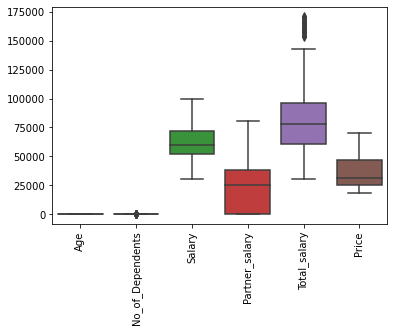

In [19]:
#Checking for Outliers
plt.xticks(rotation=90)
sns.boxplot(data=df);

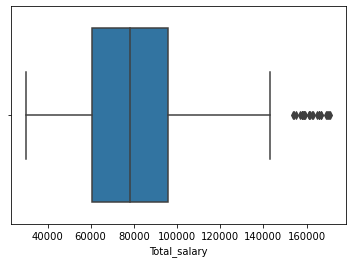

In [20]:
#Outlier Treatment for Total Salary needs to be done.
sns.boxplot(data=df, x='Total_salary');

In [21]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [22]:
lr, ur= outlier_treatment(df['Total_salary'])
print ("lower range",lr,"and upper range",ur)

lower range 7400.0 and upper range 149000.0


In [23]:
df['Total_salary']=np.where(df['Total_salary']>ur, ur, df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']<lr, lr,df['Total_salary'])

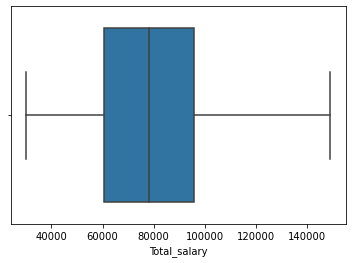

In [24]:
#Outliers are now treated
sns.boxplot(data=df, x='Total_salary');

               General Insights that can be drawn for preliminary analysis to undersatnd the dataset

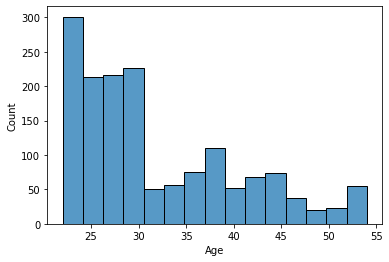

In [28]:
sns.histplot(data=df, x='Age');
#We could see that the large number of individuals aged 22-30 approximately.

<AxesSubplot:xlabel='Make', ylabel='Price'>

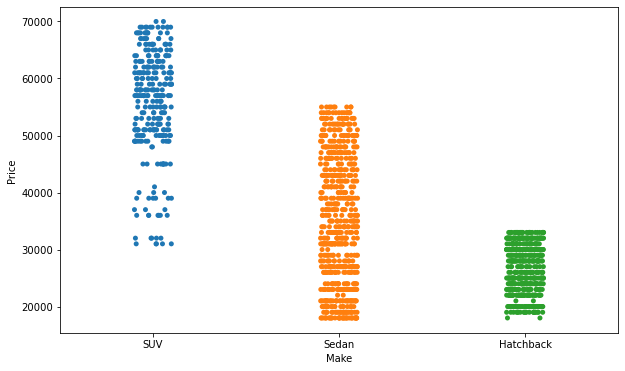

In [42]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='Make', y='Price', dodge=True)
#Out of all models, SUV is an highend vehicle followed by Sedan and Hatchback with lesser price range.

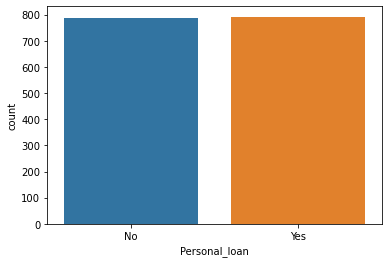

In [63]:
sns.countplot(data=df, x='Personal_loan');
#The count of individuals with ongoing peronal loan is almost same as the ones who do not have any personal loans

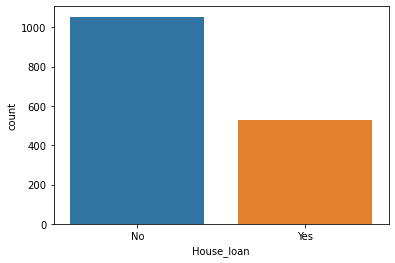

In [65]:
sns.countplot(data=df, x='House_loan');
#There is a significant count in respect to ongoing House loan.

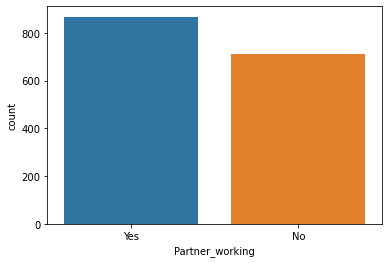

In [66]:
sns.countplot(data=df, x='Partner_working');
#The number working partners are higher compared to non-working partners.

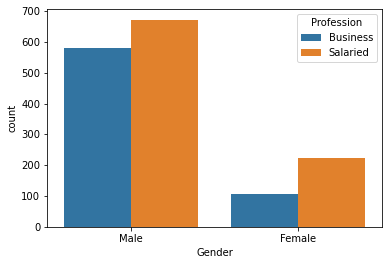

In [29]:
sns.countplot(data=df, x='Gender', hue='Profession');
# In terms of profession, irrespective of Gender there are large number of salaried individuals rather than Business Professionals.

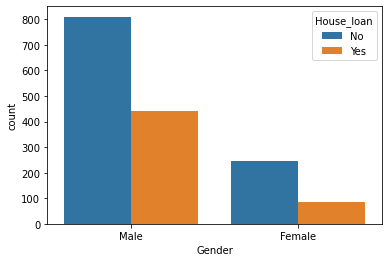

In [40]:
sns.countplot(data=df, x='Gender', hue='House_loan');

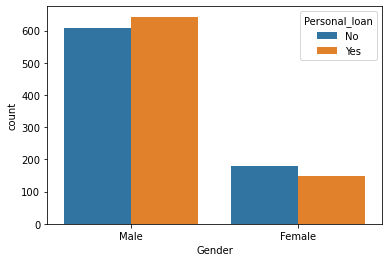

In [39]:
sns.countplot(data=df, x='Gender', hue='Personal_loan');

                   Bivariate and Multivariate Analysis to draw deeper insights.

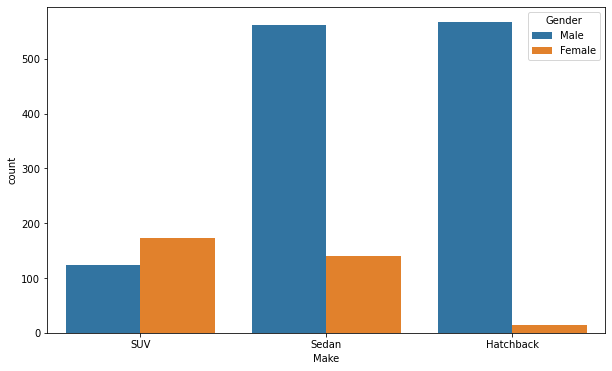

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Make', hue='Gender');
#Males tend to buy Sedan and Hatchback more compared to SUV
#Females usually prefer SUV more than Sedan, Hatchback is the least preferred

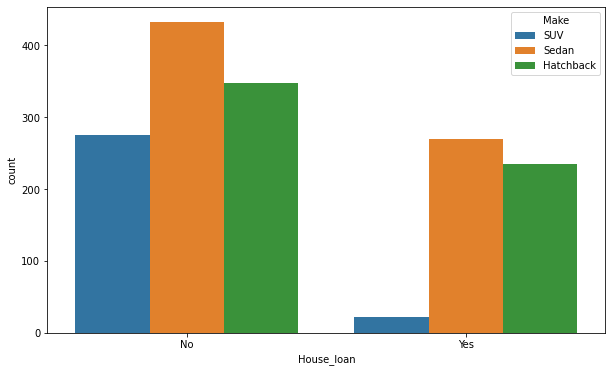

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='House_loan', hue='Make');
#As we can see the car purchase is fairly affected by the ongoing house loan.

<AxesSubplot:xlabel='Make', ylabel='Price'>

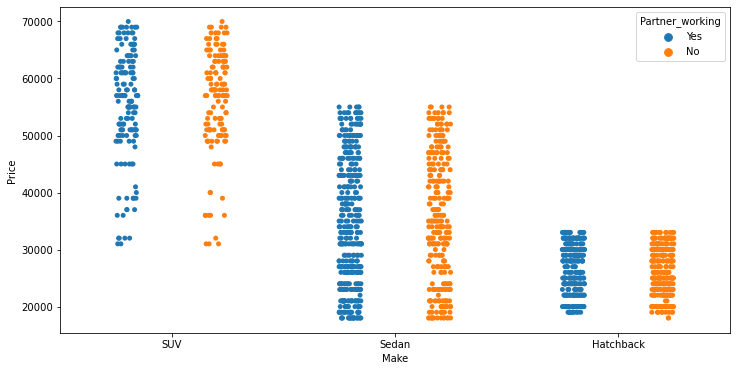

In [31]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df, y='Price', x='Make', hue='Partner_working', dodge=True) 
#This doesn't show much difference on the sales, as the preference of vehicle in all 3 categories is almost the same regardless Parther working or no.

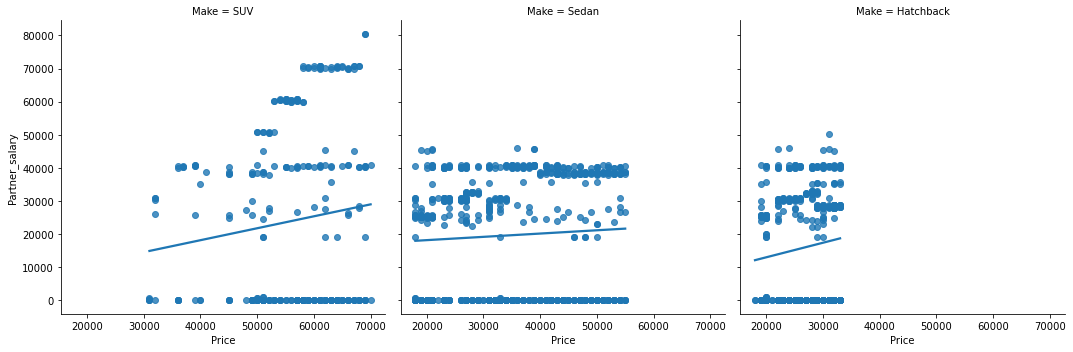

In [85]:
sns.lmplot(data=df, x='Price', y='Partner_salary', col='Make', ci=False);
#But however, we could see that fairly number of high-end cars preferred if the partner salary is high

<Figure size 1440x720 with 0 Axes>

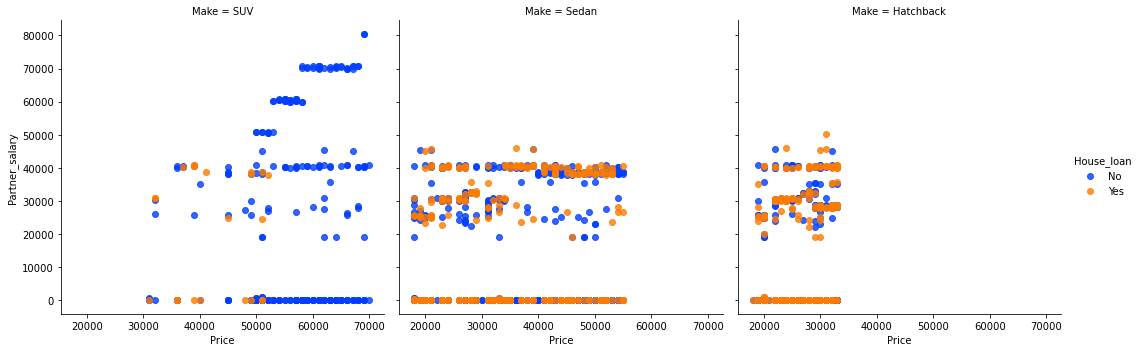

In [74]:
plt.figure(figsize=(20,10))
sns.lmplot(data=df, x="Price", y='Partner_salary',col='Make', hue="House_loan", ci=False, x_jitter=1.0, y_jitter=1.0, palette="bright", fit_reg = False);

In [ ]:
#Individuals with "NO HOUSE LOAN AND HIGHER PARTNER SALARY" tend to opt for high end SUV cars specifically
#If they have ongoing HOUSE LOAN, usually Hatchback within price range < 35,000 is opted and Sedan <56,000 is opted
#When we observe SEDAN particularly, the house loan is not causing much of difference in price range opted by the customers

#Some Marketing Campaign and also some workaround to support customers is needed to target the customers with ongoing HOUSE LOAN

<AxesSubplot:xlabel='Make', ylabel='count'>

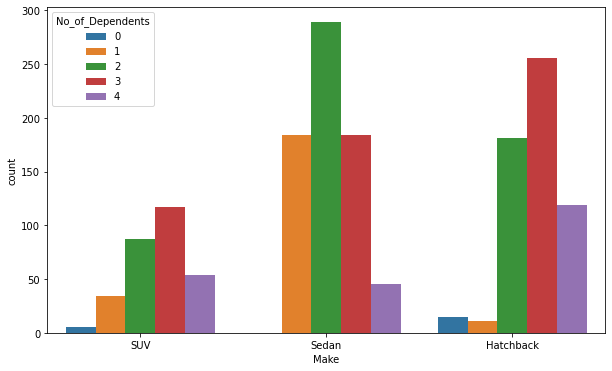

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Make', hue='No_of_Dependents')
#Hatchback is prefered more by the bigger families, Sedan seems preferred when the members are 2-3

<AxesSubplot:xlabel='Marital_status', ylabel='Price'>

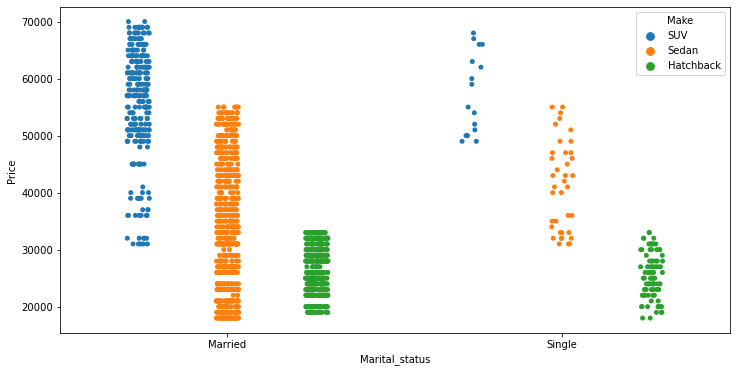

In [76]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df, x='Marital_status', y='Price', hue='Make', dodge=True)
#Married Couples tend to consider buying cars compared to single iondividuals

In [ ]:
#Married Couples tend to opt SEDAN compared to other model
#Marketing startegy can be worked on so that the Married Couple already preferring for SEDAN can opt for Highend SEDAN
#Probably some workaround and marketing can be made to target the Single customers to make them opt the SEDAN as there are some already opting them

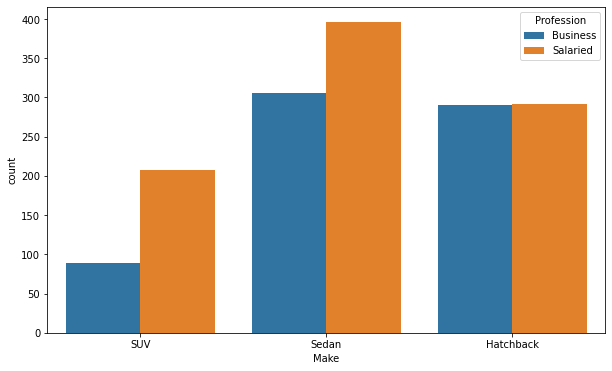

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Make',hue='Profession');
#If observed carefully, the salaried individuals prefer Sedan more, and SUV is least preferred by both Business and Salaried Perosns among all three models

<Figure size 720x432 with 0 Axes>

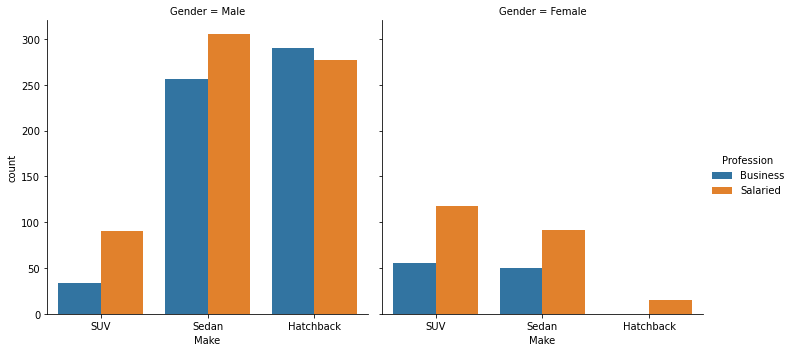

In [91]:
plt.figure(figsize=(10,6))
sns.catplot(data=df, x='Make',col='Gender',hue='Profession',kind='count');
#Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale?
#Answer: No!

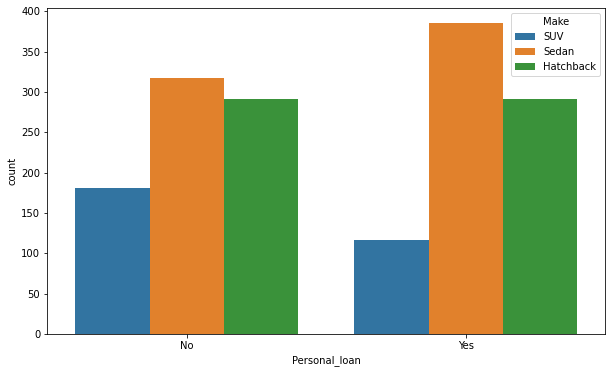

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Personal_loan', hue='Make');
#Though the personal loan does not largely affect the sales, there is a slight hinderance observed. However, Sedan is preferred when there is ongoing personal loan.

#                                         PROBLEM 02

In [2]:
df1 = pd.read_excel('godigt_cc_data.xlsx')

In [3]:
df1.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [4]:
df1.shape

(8448, 28)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [6]:
df1.describe()

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,8448.00000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.993016,1.674595e+06,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,49527.365530,251706.912879
std,2438.87187,30489.752417,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.571773,1.064307e+06,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,46244.954836,229114.856385
min,1.00000,376916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000950e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.061104e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17110.000000,90000.000000
50%,4224.50000,437551.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.372134e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37943.000000,150000.000000
75%,6336.25000,438439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.881734e+06,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66095.750000,350000.000000
max,8448.00000,524178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.999508e+06,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289292.000000,990000.000000


In [7]:
#Checking for duplicates
df1.duplicated().sum()

0

In [8]:
#Checking for missing values
df1.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [9]:
pd.options.display.float_format = '{:,.4f}'.format
df1["annual_income_at_source"] = df1["annual_income_at_source"].astype(int)

In [10]:
#Scaling needs to be done for cc_limit, avg_spends_l3m avg_spends_l3m using MinMax Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[["annual_income_at_source", "cc_limit","avg_spends_l3m"]] = scaler.fit_transform(df1[["annual_income_at_source", "cc_limit","avg_spends_l3m"]])

In [12]:
#After Scaling
df1.describe()

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,"8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000","8,448.0000"
mean,"4,224.5000","436,747.0445",0.2924,0.4948,0.6420,0.2841,0.4845,0.6323,3.6146,3.9930,0.3072,33.1642,0.1113,0.0479,0.0804,0.0089,0.0095,0.1712,0.2542
std,"2,438.8719","30,489.7524",0.4549,0.5000,0.4794,0.4510,0.4998,0.4822,2.2732,2.5718,0.2218,15.8683,0.3145,0.2137,0.2719,0.0938,0.0969,0.1599,0.2314
min,1.0000,"376,916.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"2,112.7500","426,241.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,0.1794,19.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0591,0.0909
50%,"4,224.5000","437,551.0000",0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,4.0000,4.0000,0.2442,33.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1312,0.1515
75%,"6,336.2500","438,439.0000",1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,6.0000,6.0000,0.3504,47.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2285,0.3535
max,"8,448.0000","524,178.0000",1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,7.0000,8.0000,1.0000,60.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


             Considering 5 main variables for the data analysis.
1. Annual Income
2. Occupation
3. Average Amount spent
4. cc limit
5. Other bank CC

        Now lets considering the comparison between the above mentioned 5 variables, to understand the dataset better

In [13]:
df1.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

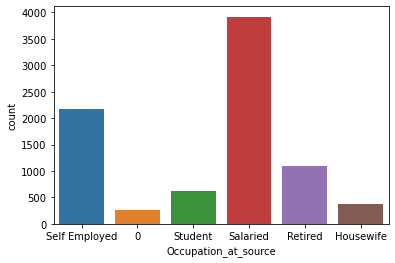

In [14]:
sns.countplot(data=df1, x='Occupation_at_source');
#We can see that we have largest group of costumers are salaried, followed by Self Employment.

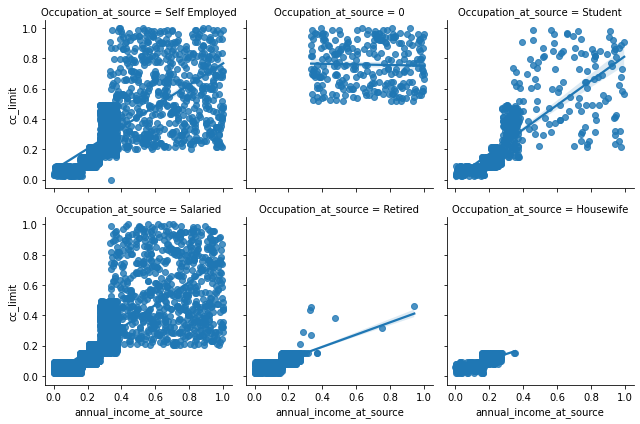

In [15]:
sns.lmplot(data=df1, x='annual_income_at_source', y='cc_limit', col='Occupation_at_source', col_wrap=3, height=3);
#If we observe the below representation, most of the higher salary are from Salaried and Self Employed.

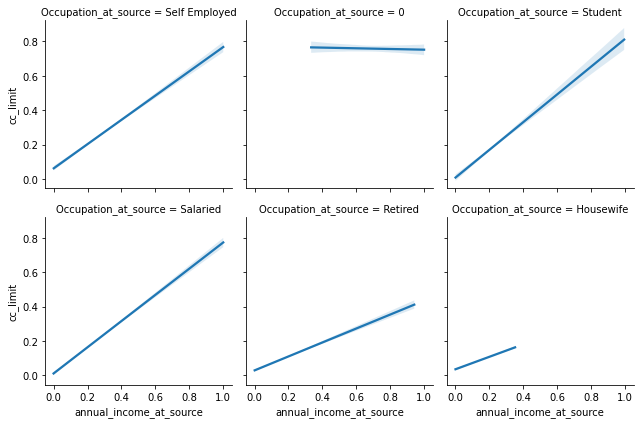

In [16]:
sns.lmplot(data=df1, x='annual_income_at_source', y='cc_limit', col='Occupation_at_source', col_wrap=3, height=3, scatter=False);
#Higher is the annual income so is the cc limit

In [ ]:
sns.lmplot(data=df1, x='avg_spends_l3m', y='cc_limit', col='Occupation_at_source',scatter=False, col_wrap=3, height=3);
#Higher is the cc_limit higher is the amount spent

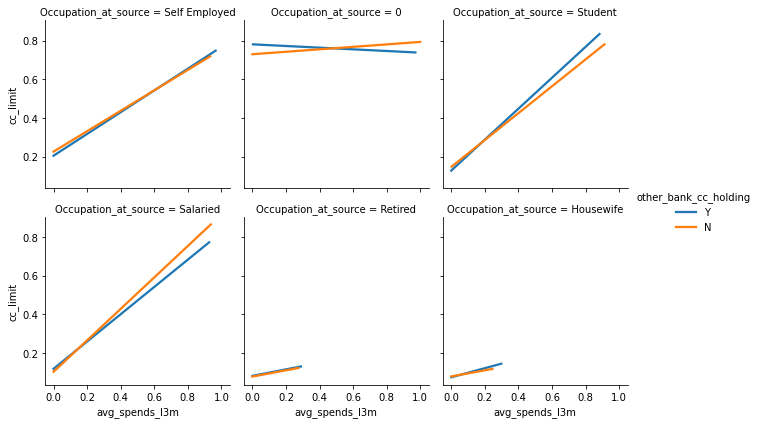

In [19]:
sns.lmplot(data=df1, x='avg_spends_l3m', y='cc_limit', col='Occupation_at_source', hue='other_bank_cc_holding',scatter=False,ci=False, col_wrap=3, height=3);
#Even if the individuals hold another Credit card, it does not have much effect on the amount spent except for HOUSEWIVES

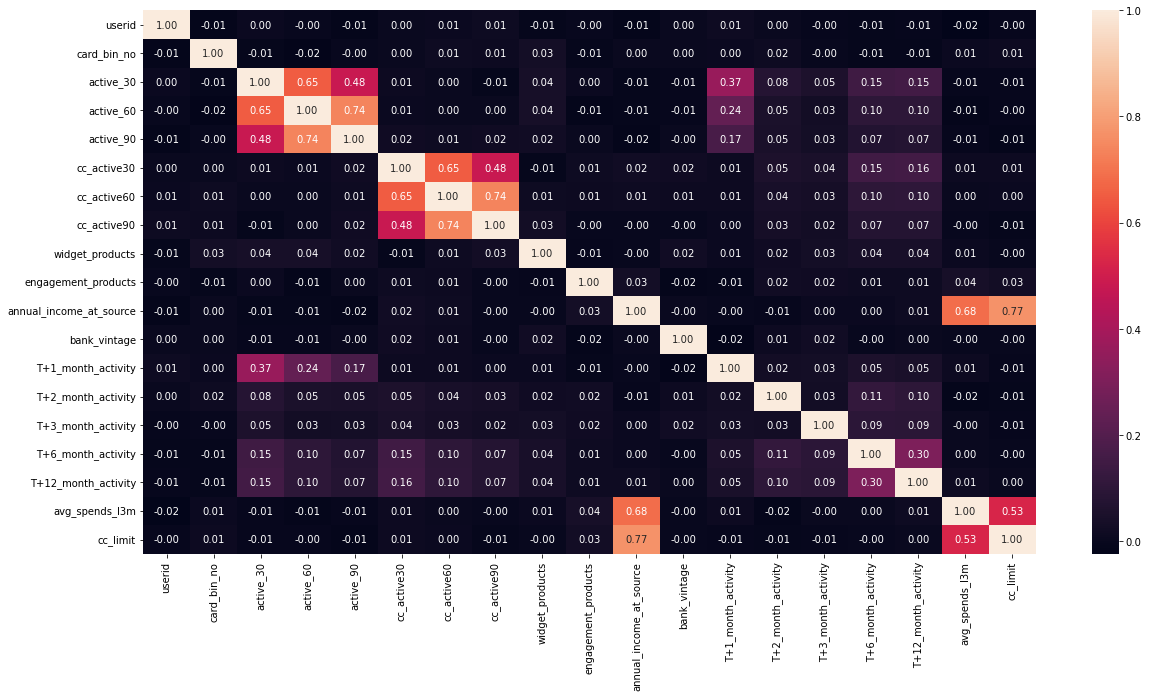

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, fmt='.2f');